In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
// Code to be able to number equations in the markdown

<IPython.core.display.Javascript object>

## Explicit finite difference scheme

### Rewriting equation in terms of row (position) and column (time) indicies.

The equation (Eq. 4.0 in doc) given to me by Jack is: 

$$ E^{n+1}_i = \left ( \frac{\Delta t}{\Delta x} \frac{c}{n} \right )^2 (E^{n}_{i+1} - 2E^{n}_{i} + E^{n}_{i-1})-(-2E^{n}_{i} + E^{n-1}_{i}) $$

I want to have the equation in terms of rows and columns, so ultimately I want to rewrite the following equation to be in the form of rows and columns: 

\begin{equation}
E^{n+1}_{i} = rE^{n}_{i-1} + (1-2r)E^{n}_{i} + rE^{n}_{i+1}
\end{equation}

where $ \displaystyle r = \left ( \frac{\Delta t}{\Delta x} \frac{c}{n} \right ) $ and n is the position index and i is the time index (dimensionless)

So I express the above equation as:

\begin{equation}
E^{n}_{i} = rE^{n-1}_{i-1} + (1-2r)E^{n}_{i-1} + rE^{n+1}_{i-1} 
\end{equation}

This is going to calculate a value based on a weighted average. If we think of a matrix, it will use a sum of the previous
time value and it's adjacent values. The reason I chose to modify the equation this way was because I was following a book/video that solved PDEs using Python and they chose to do it this way.

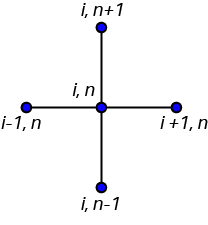

Using the image above, we use i,n;i-1,n;i+1,n and take a weighted average to find i,n+1. However we can define our i,n+1 point to be i,n and then use Eq(2) to find the value.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Defining global arrays for I, E, T_e, T_i, n_e, rho


In [4]:
I = np.zeros((10, 10))
E = np.zeros((10, 10))
T_e = np.zeros((10, 10))
T_i = np.zeros((10, 10))
n_e = np.zeros((10, 10))
rho = np.zeros((10, 10))

### Defining parameters needed to solve differential equation: $ \nabla^{2} E - \frac{n^2}{c^2} \frac{\partial^2 E}{\partial t^{2}} = 0$

### Explicitly, we update Eq(1)

In [122]:
# Unit conversions
ps = 10**-12    # picoseconds unit
nm = 10**-9     # nanometers unit

# Physical parameters
RefractiveIndex = 1         # unitless
speed_of_light = 299792458  # in m/s not sure if should simplify to 3E8 m/s

# Grid and time parameters
T = 1 * ps              # time in seconds (* picoseonds) (in the future, will represent modeling time)
n_timestep = 1000       # n time step
L = 500 * nm            # length in SI units in meters
n_cells = 10            # number of cells (can also think of as number of grid points)
delta_x = L/n_cells     # spatial time-step (can also think of as grid spacing)
delta_t = T/n_timestep  # time related time-step

x = []  # spatial domain (can also think of as coordinates of grid points)
t = []  # time domain

# Creating arrays for the spatial and time domains. Starting at -2 in order to create ghost cells. And ending with + 3 for the same reason
# The ghost cells are there so that in the matrix we can access all indeces
# To append, using formula Dr. Woo gave me: X_i = delta_x(i + 1/2)
for i in range(-2, n_cells + 3):
    x.append(delta_x * (i + 0.5))

for i in range(-2, n_timestep + 3):
    t.append(delta_t * (i + 0.5))
    
x = np.array(x)
t = np.array(t)
n, m = len(x), len(t)
E = np.zeros((n, m))

# Boundary conditions
boundaryConditions = [0, 0] # left and right boundary all 0s 
E[0,:] = boundaryConditions[0] # left 'wall' of grid
E[-1, :] = boundaryConditions[1] # right 'wall of grid'

# Initial conditions
initialConditions = np.sin(np.pi*x) # random initial condition
E[:, 0] = initialConditions # we want all positions at time 0 or first time

r_const = ((delta_t/delta_x) * (speed_of_light/RefractiveIndex))

# These loops will go through the grid. We start at 1 so as to not calculate the
# value when the a time or spatial point is equal to 0.
for j in range(1, m):
    for i in range(1, n-1):
        E[i, j] = r_const*E[i-1, j-1] * (1-2*r_const)*E[i, j-1] + r_const*E[i+1, j-1]
        
E

C:\Users\nickd\AppData\Local\Temp\ipykernel_12752\4262885518.py:49: RuntimeWarning: overflow encountered in scalar multiply
  E[i, j] = r_const*E[i-1, j-1] * (1-2*r_const)*E[i, j-1] + r_const*E[i+1, j-1]
C:\Users\nickd\AppData\Local\Temp\ipykernel_12752\4262885518.py:49: RuntimeWarning: invalid value encountered in scalar add
  E[i, j] = r_const*E[i-1, j-1] * (1-2*r_const)*E[i, j-1] + r_const*E[i+1, j-1]


array([[-2.35619449e-07,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.85398163e-08,  4.70911672e-07,  8.47057044e-06, ...,
                    nan,             nan,             nan],
       [ 7.85398163e-08,  1.41273908e-06,  1.41175622e-05, ...,
                    nan,             nan,             nan],
       ...,
       [ 1.64933614e-06,  1.08308343e-05,  7.05798305e-05, ...,
                    nan,             nan,             nan],
       [ 1.80641578e-06,  1.17726259e-05, -8.40331717e-09, ...,
                    nan,             nan,             nan],
       [ 1.96349541e-06,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

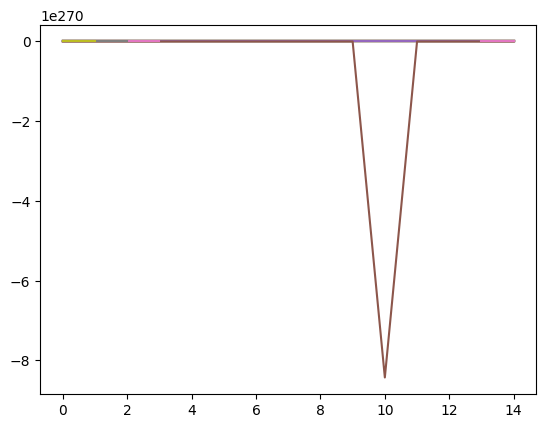

In [123]:
plt.plot(E)
plt.show()

In [7]:
# Physical parameters
alpha = 0.1                     # Heat transfer coefficient
lx = 1.                         # Size of computational domain

# Grid parameters
nx = 21                         # number of grid points 
dx = lx / (nx-1)                # grid spacing
x = np.linspace(0., lx, nx)     # coordinates of grid points

# Time parameters
ti = 0.                         # initial time
tf = 5.                         # final time
fourier = 0.49                  # Fourier number
dt = fourier*dx**2/alpha        # time step
nt = int((tf-ti) / dt)          # number of time steps

# Initial condition
T0 = np.sin(2*np.pi*x)          # initial condition
source = 2*np.sin(np.pi*x)      # heat source term

In [11]:
def rhs_centered(T, dx, alpha, source):
    """Returns the right-hand side of the 1D heat
    equation based on centered finite differences
    
    Parameters
    ----------
    T : array of floats
        solution at the current time-step.
    dx : float
        grid spacing
    alpha : float
        heat conductivity
    source : array of floats
        source term for the heat equation
    
    Returns
    -------
    f : array of floats
        right-hand side of the heat equation with
        Dirichlet boundary conditions implemented
    """
    nx = T.shape[0]
    f = np.empty(nx)
    
    f[1:-1] = alpha/dx**2 * (T[:-2] - 2*T[1:-1] + T[2:]) + source[1:-1]
    f[0] = 0.
    f[-1] = 0.
    
    return f

In [12]:
def exact_solution(x,t, alpha):
    """Returns the exact solution of the 1D
    heat equation with heat source term sin(np.pi*x)
    and initial condition sin(2*np.pi*x)
    
    Parameters
    ----------
    x : array of floats
        grid points coordinates
    t: float
        time
    
    Returns
    -------
    f : array of floats
        exact solution
    """
    # Note the 'Pythonic' way to break the long line. You could
    # split a long line using a backlash (\) but the conventional
    # way is to embrace your code in parenthesis.
    #
    # For more info we refer you to PEP8:
    # https://www.python.org/dev/peps/pep-0008/#id19 
    f = (np.exp(-4*np.pi**2*alpha*t) * np.sin(2*np.pi*x)
      + 2.0*(1-np.exp(-np.pi**2*alpha*t)) * np.sin(np.pi*x) 
      / (np.pi**2*alpha))
    
    return f

In [15]:
def euler_step(u, f, dt, *args):
    """Returns the solution at the next time-step using 
    the forward Euler method.
    
    Parameters
    ----------
    u : array of floats
        solution at the current time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    args : optional arguments for the rhs function
    
    Returns
    -------
    unp1 : array of floats
        approximate solution at the next time step.
    """
    unp1 = u + dt * f(u, *args)
    return unp1


In [16]:
T = np.empty((nt+1, nx))
T[0] = T0.copy() # initial condition?

for i in range(nt):
    T[i+1] = euler_step(T[i], rhs_centered, dt, dx, alpha, source)

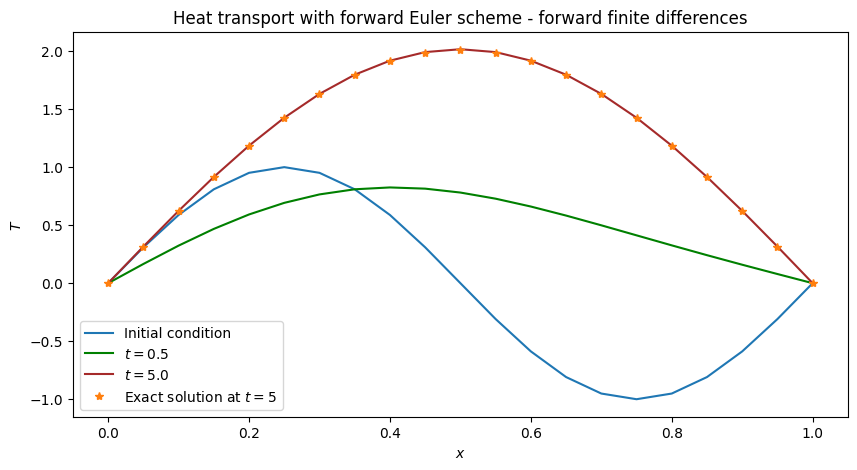

In [17]:
# plot the solution at several times
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x, T[0], label='Initial condition')
ax.plot(x, T[int(0.5/dt)], color='green', label='$t=0.5$')
ax.plot(x, T[-1], color='brown', label=f'$t={tf}$')
ax.plot(x, exact_solution(x, 5.0, alpha), '*', label='Exact solution at $t=5$')


ax.set_xlabel('$x$')
ax.set_ylabel('$T$')
ax.set_title('Heat transport with forward Euler scheme'
             ' - forward finite differences')
ax.legend();

## Questions:

* Good initial condition?

In [8]:
# We need to initialize a E matrix which will store our values to go through in it.
n = len(x)
m = len(t)
boundaryConditions = [0, 0] # set it as left and right boundary as all zeroes 

E = np.zeros((n, m))

# Defining boundary conditions:
#Looking at our matrix, then our boundary conditions would be the "walls." 
#So basically it would be where our position is 0? (or -1?) and when our position at it's end so 20 (or 21?) not sure.

# All time points where position is -1

#### Function 'ElectricFieldExplicit takes the following inputs:

* **x**, the input vector x to represent spatial coordinates. This will be a vector of equal step size, **delta_x**.

* **t**, the input vector t to represent time coordinates. This will be a vector of equal step size, **delta_y**.

* **boundary_conditions**, the boundary conditions (not sure what to do here yet) E(x=0, t) and E(x=?, t) ??

* **initial_conditions**, the initial conditions

